## Google Trends Prediction

In [171]:
df = pandas.read_csv('data/multiTimeline.csv')

In [245]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

In [205]:
dataset = df['cnt'].values

In [239]:
X_train = []
y_train = []
for i in range(7, 168):
    X_train.append(dataset[i-7:i])
    y_train.append(dataset[i])
    
X_train, y_train = np.array(X_train), np.array(y_train)   

In [240]:
X_train.shape

(161, 7)

In [241]:
X_train2 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [242]:
X_train2.shape

(161, 7, 1)

In [243]:
y_train.shape

(161,)

In [246]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train2.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [248]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train2, y_train, epochs = 100, batch_size = 2)

Epoch 1/100
161/161 [==============================] - 2s 15ms/step - loss: 170.8731
Epoch 2/100
161/161 [==============================] - 1s 5ms/step - loss: 159.8110
Epoch 3/100
161/161 [==============================] - 1s 5ms/step - loss: 130.0978
Epoch 4/100
161/161 [==============================] - 1s 5ms/step - loss: 143.3387
Epoch 5/100
161/161 [==============================] - 1s 5ms/step - loss: 123.2471
Epoch 6/100
161/161 [==============================] - 1s 5ms/step - loss: 116.1191
Epoch 7/100
161/161 [==============================] - 1s 5ms/step - loss: 103.7111
Epoch 8/100
161/161 [==============================] - 1s 5ms/step - loss: 99.4034
Epoch 9/100
161/161 [==============================] - 1s 5ms/step - loss: 85.9224
Epoch 10/100
161/161 [==============================] - 1s 5ms/step - loss: 89.9580
Epoch 11/100
161/161 [==============================] - 1s 5ms/step - loss: 78.3379
Epoch 12/100
161/161 [==============================] - 1s 5ms/step - loss: 7

In [249]:
predicted = regressor.predict(X_train2)
#dataset

In [250]:
#predicted

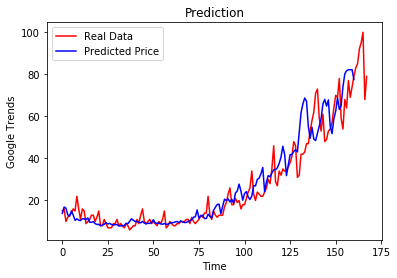

In [251]:
import matplotlib.pyplot as plt
plt.plot(dataset, color = 'red', label = 'Real Data')
plt.plot(predicted, color = 'blue', label = 'Predicted Price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Google Trends')
plt.legend()
plt.show()